# 6장에서 배울 것들
• 직선이나 평면이 아닌 회귀 함수가 가능한가.

• 데이터의 특징에 따라 분류나 의사결정의 기준을 정할 수 있는가.

• 지금의 딥러닝 이전에 가장 강력한 기계 학습 방법은 어떤 것들이 있었나.

• 다양한 기계 학습 방법들은 어떤 장단점이 있나

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv')
life.head()

life = life[['Life expectancy', 'Alcohol', 'Percentage expenditure',               
             'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]
life.dropna(inplace = True)

X = life[['Alcohol', 'Percentage expenditure', 'Polio',
          'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']



In [4]:
# preprocessing 서브 모듈의 PolynomialFeatures 클래스를 활용해
# 입력 데이터를 다항 회귀에 사용
from sklearn.preprocessing import PolynomialFeatures

poly_feature = PolynomialFeatures(degree = 3)
X = poly_feature.fit_transform(X)

Mean squared error: 25.369444106546368


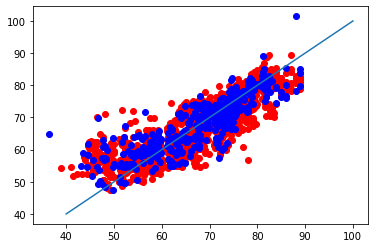

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_hat_train = lin_model.predict(X_train)
y_hat_test = lin_model.predict(X_test)
plt.scatter(y_train, y_hat_train, color='r')
plt.scatter(y_test, y_hat_test, color='b')
plt.plot([40, 100], [40, 100])
print('Mean squared error:', mean_squared_error(y_test, y_hat_test))

In [6]:
# 찾은 회귀 함수가 학습을 수행한 훈련용 데이터에 대해서는 어느 정도 오차를 가지는지 확인 
print('Mean squared error:', mean_squared_error(y_train, y_hat_train))

Mean squared error: 22.680868958737012


In [7]:
# 8차 다항식을 사용하면 이것보다 더 입력의 크기가 매우 커짐
X.shape

(2306, 84)

## LAB 6-1 다항 회귀의 회귀 함수를 그려보자

In [8]:
# 다른 라이브러리들은 위에서 불러왔으므로 생략
import numpy as np

df = pd.read_csv('https://github.com/dknife/ML/raw/main/data/nonlinear.csv')


In [13]:
df.describe()

,x,y
count,1000.000000,1000.000000
mean,0.493986,0.233843
std,0.287668,0.785634
min,0.001947,-2.212464
25%,0.244912,-0.340758
50%,0.485865,0.248391
75%,0.740998,0.819851
max,0.999738,2.424855


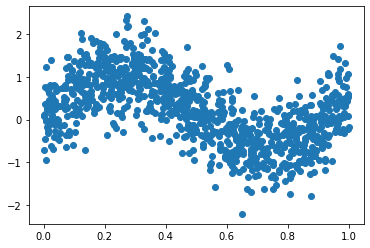

In [11]:
# 시각화
plt.scatter(df['x'], df['y'])

In [14]:
from sklearn.preprocessing import PolynomialFeatures
# to_numpy() 메서드는 pandas 객체를 ndarray(numpy 배열)로 반환함
X = df['x'].to_numpy()
y = df['y'].to_numpy()
X = X.reshape(-1,1)     
feature_cubic = PolynomialFeatures(degree = 3)
X_3 = feature_cubic.fit_transform(X)